In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df=df.drop(["Gender","Married"],axis=1)
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.isnull().sum()

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [10]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [11]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Label = ["Loan_ID","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

for i in Label:
    df[i] = le.fit_transform(df[i])

In [16]:
df

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


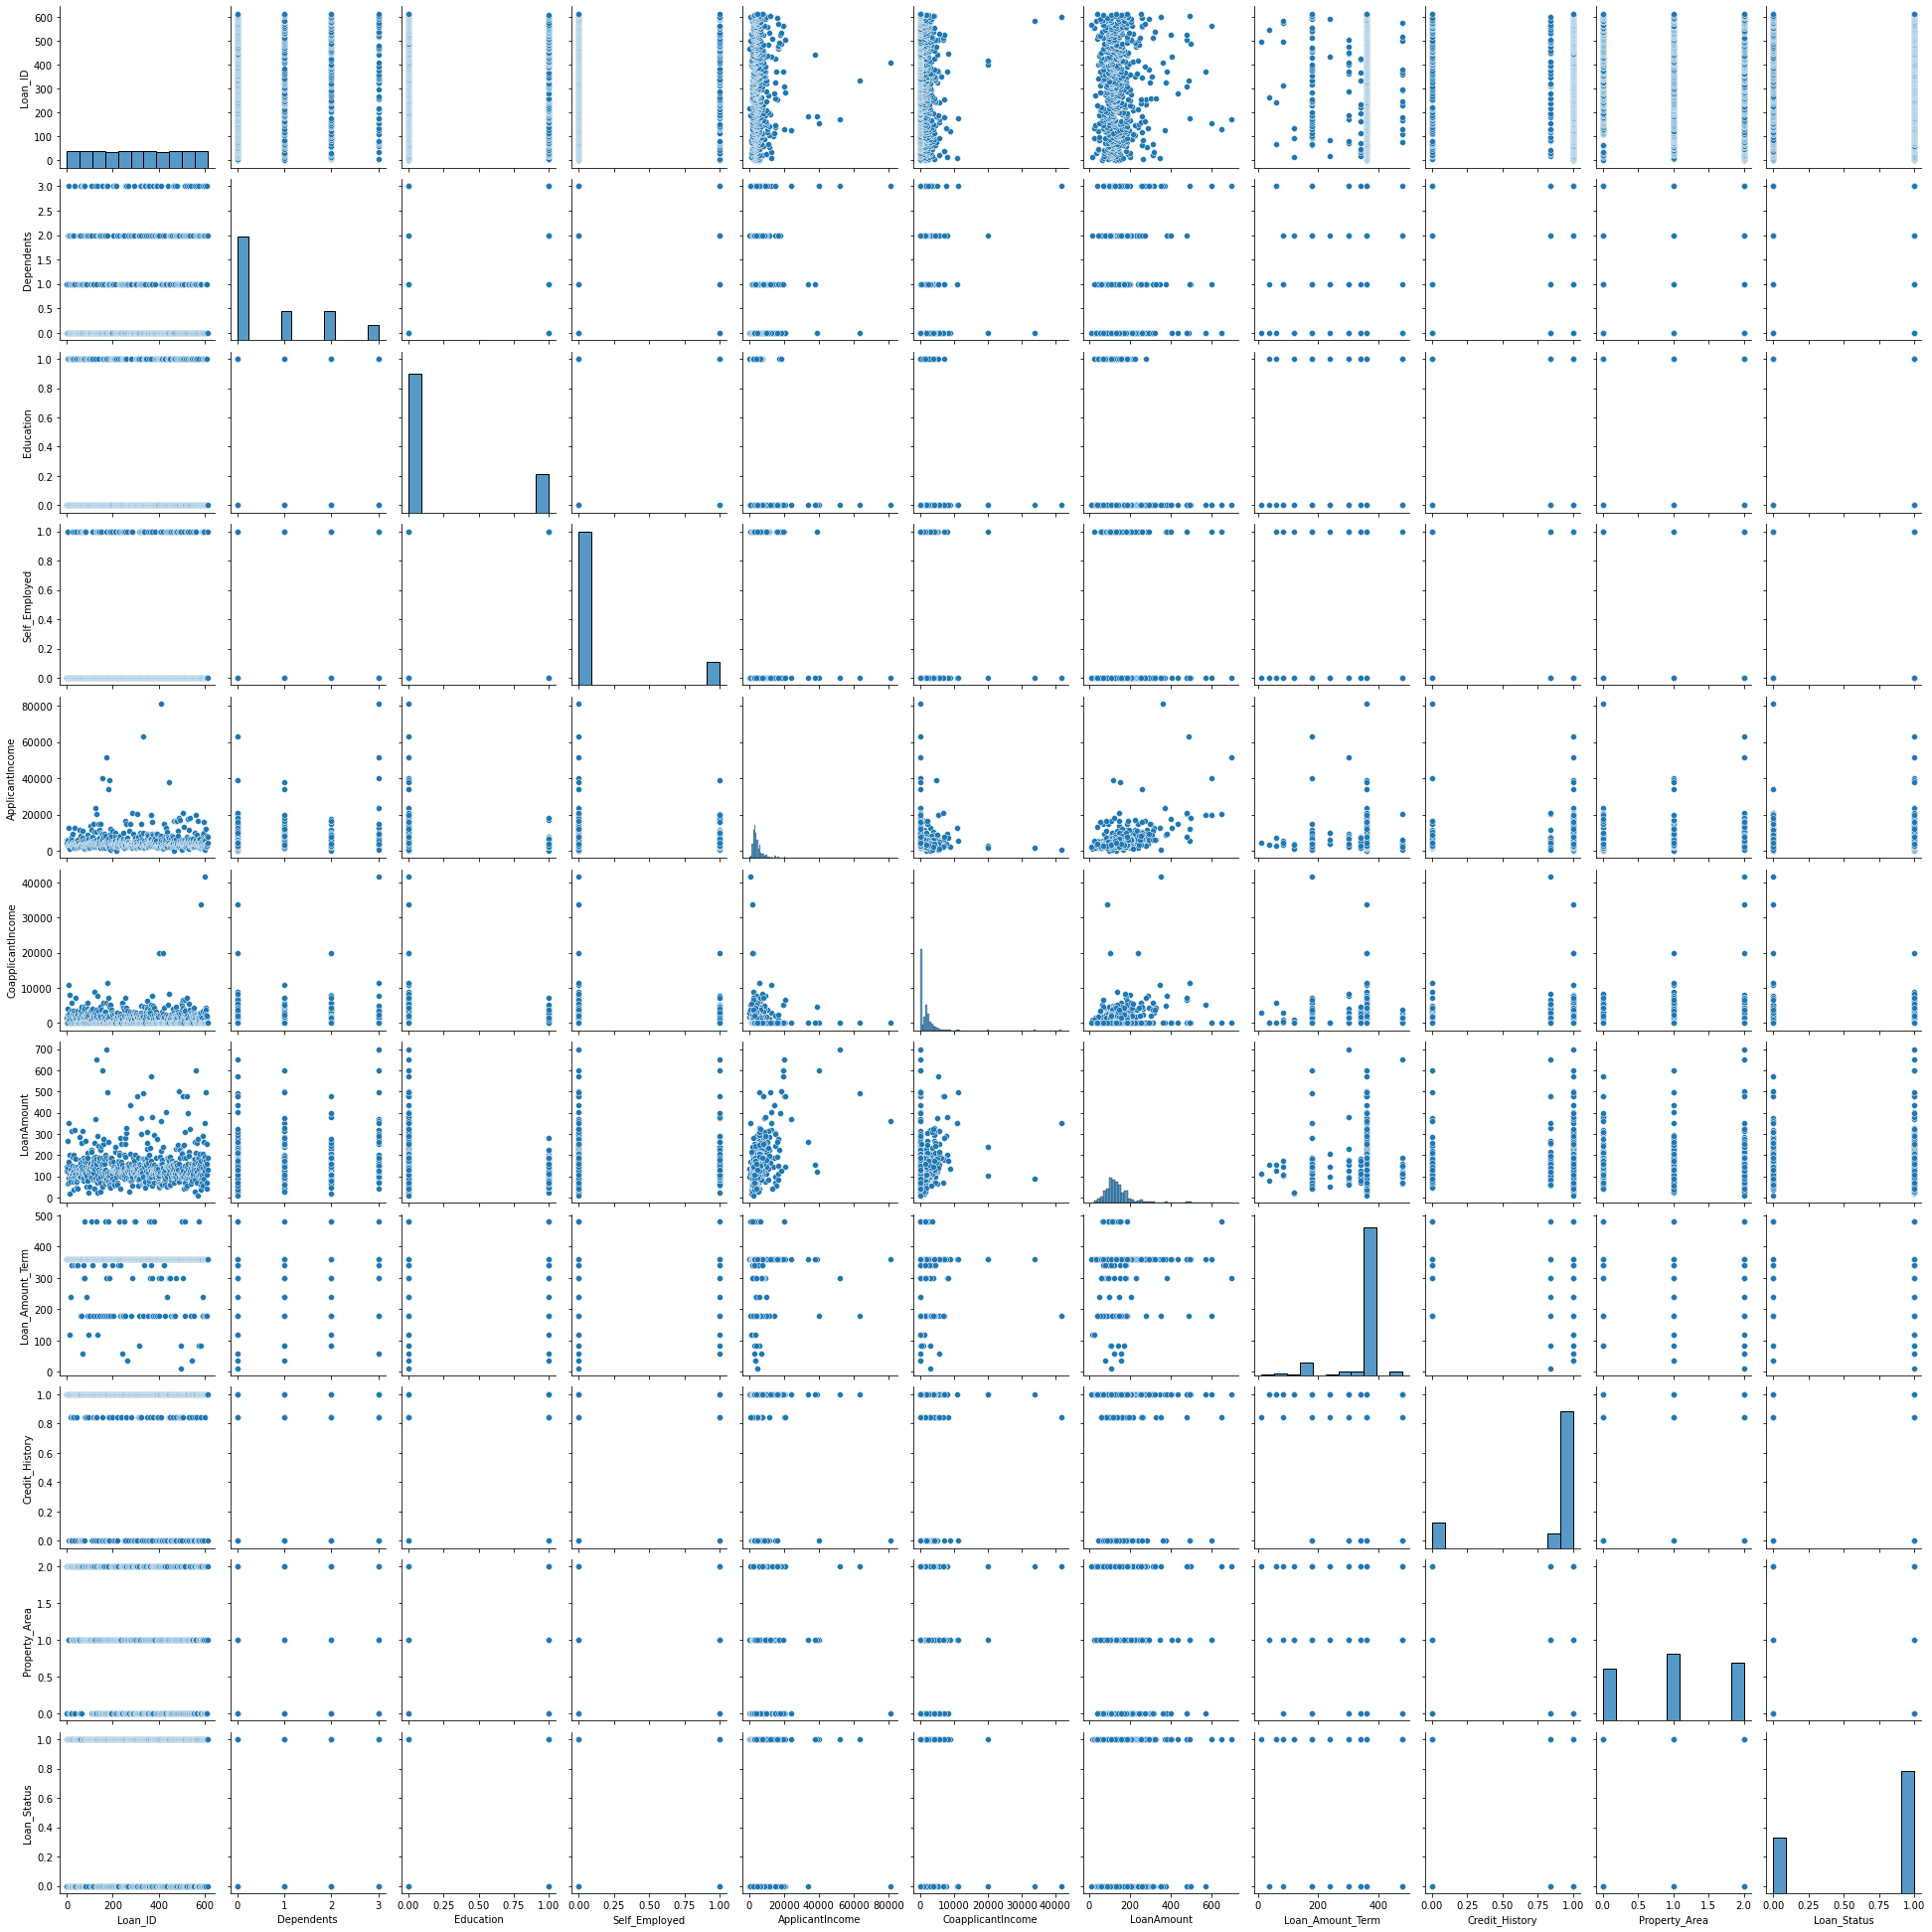

In [17]:
sns.pairplot(df)

Loan_ID                 AxesSubplot(0.125,0.749828;0.133621x0.130172)
Dependents           AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Education             AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Self_Employed        AxesSubplot(0.606034,0.749828;0.133621x0.130172)
ApplicantIncome      AxesSubplot(0.766379,0.749828;0.133621x0.130172)
CoapplicantIncome       AxesSubplot(0.125,0.593621;0.133621x0.130172)
LoanAmount           AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Loan_Amount_Term      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Credit_History       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Property_Area        AxesSubplot(0.766379,0.593621;0.133621x0.130172)
dtype: object

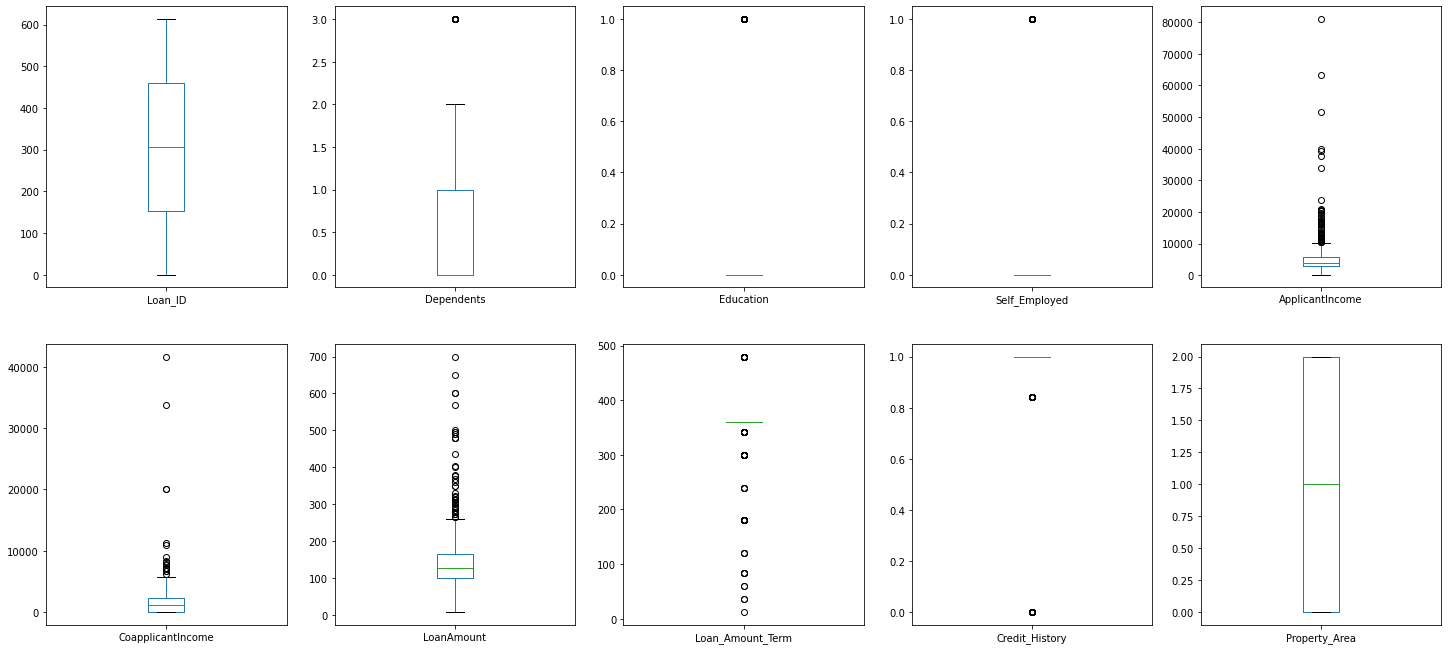

In [18]:
df.drop(["Loan_Status"],axis=1).plot(kind='box',subplots=True,layout=(5,5),figsize=(25,30))

In [19]:
X=df.drop(["Loan_Status"],axis=1)
Y=df.Loan_Status

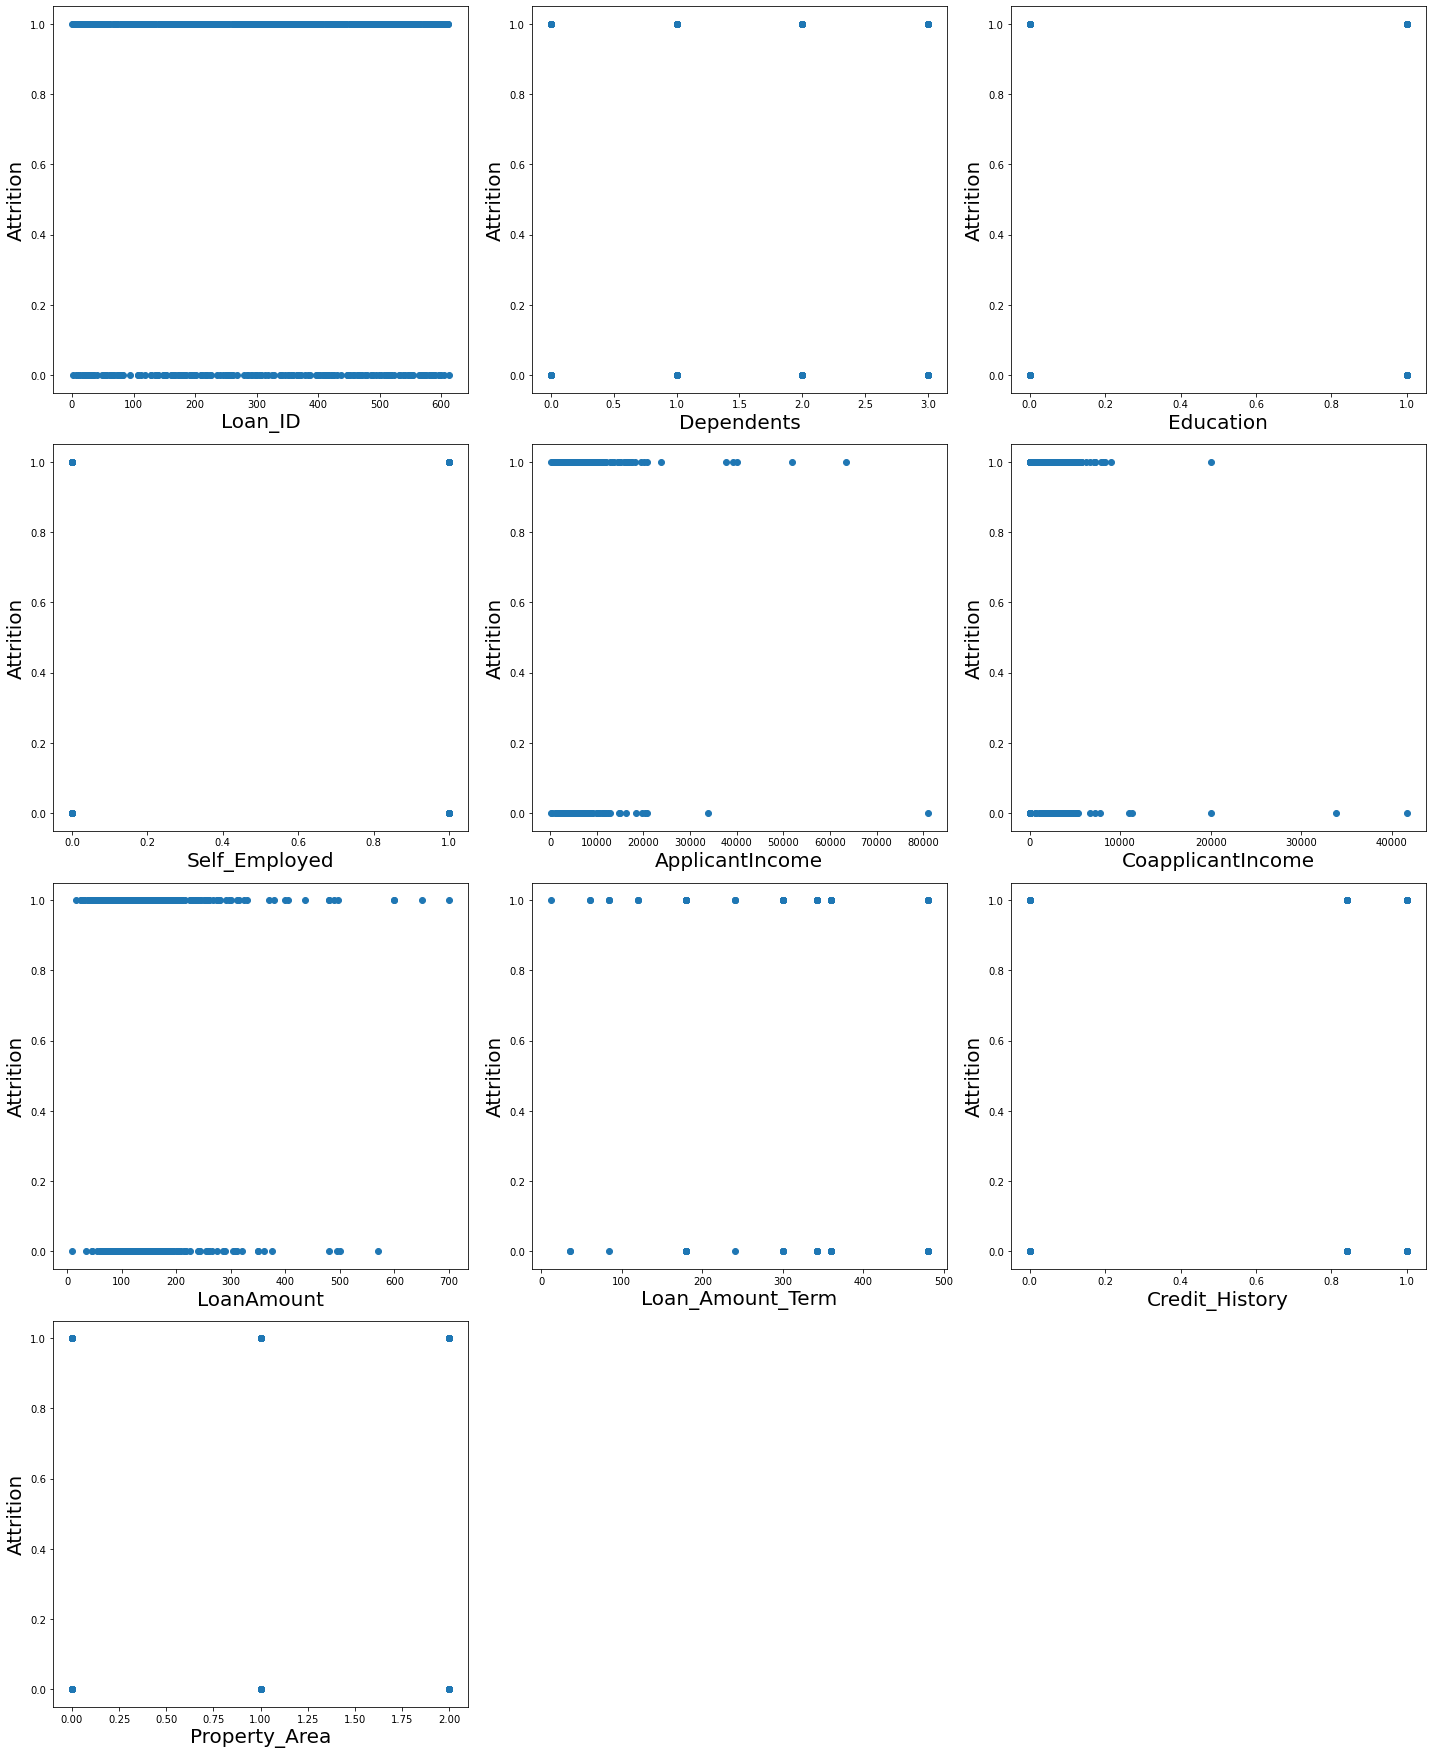

In [20]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    pltnumber+=1
plt.tight_layout()


0.0
1.0130683122414248
1.3642786441579564
2.1545162372084
6.523526250899361
7.473216996340462
2.719935540956202
-2.3838380001508668
-1.9588001568214484
-0.06603431807343829
-0.8080179267715549


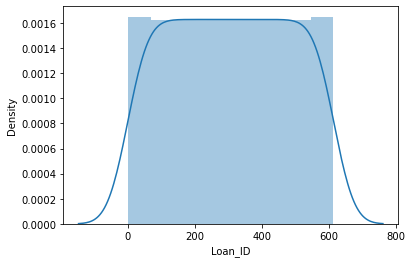

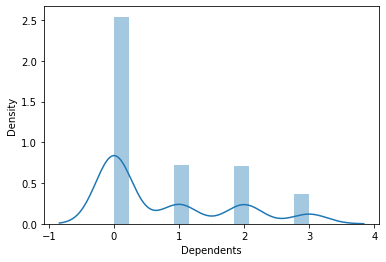

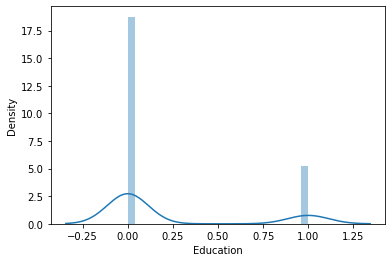

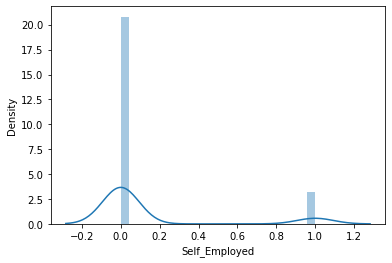

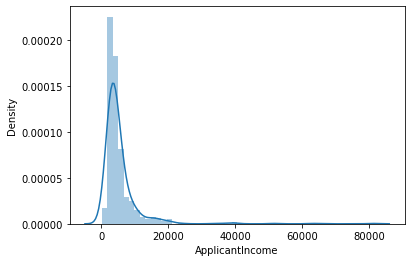

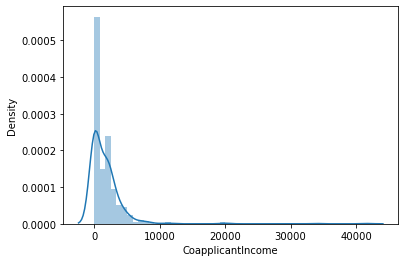

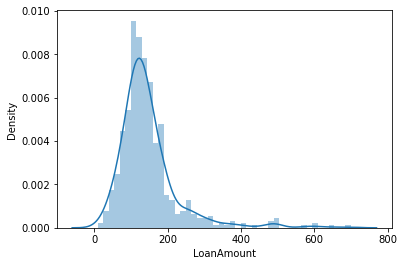

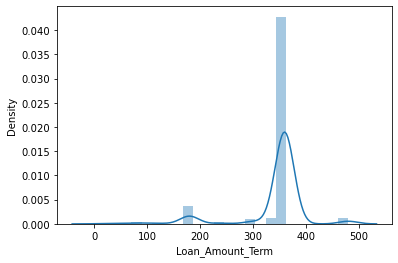

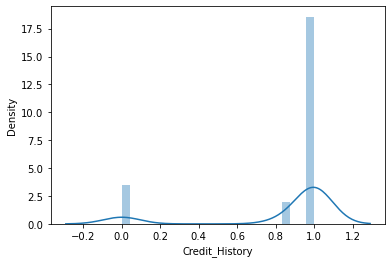

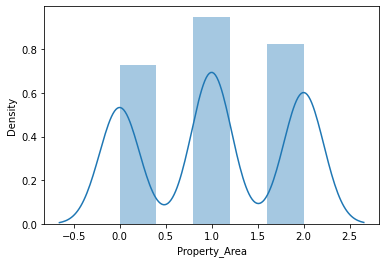

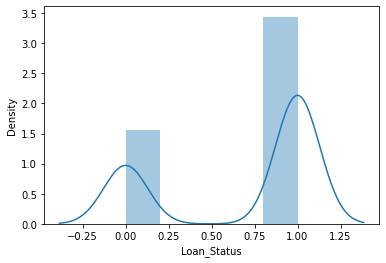

In [21]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [22]:
df.skew()

Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [23]:
df["Education"]=np.sqrt(df["Education"])
df["Self_Employed"]=np.cbrt(df["Self_Employed"])
df["ApplicantIncome"]=np.cbrt(df["ApplicantIncome"])

In [24]:
df.skew()

Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [25]:
df["Education"]=np.cbrt(df["Education"])
df["Self_Employed"]=np.cbrt(df["Self_Employed"])
df["ApplicantIncome"]=np.cbrt(df["ApplicantIncome"])

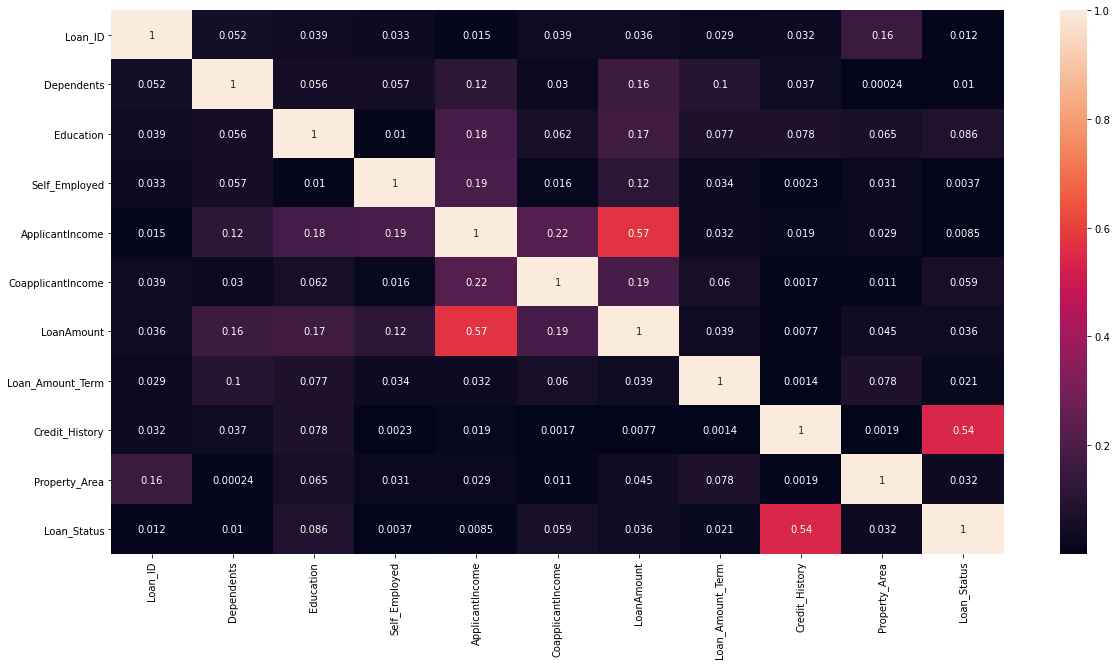

In [26]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)
plt.show()

In [27]:
X=df.drop(columns="Loan_Status")
Y=df["Loan_Status"]

In [28]:
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]=X.columns
vif

,vif,Features
0,1.033062,Loan_ID
1,1.050992,Dependents
2,1.078433,Education
3,1.042730,Self_Employed
4,1.895874,ApplicantIncome
5,1.275982,CoapplicantIncome
6,1.813981,LoanAmount
7,1.043888,Loan_Amount_Term
8,1.008926,Credit_History
9,1.040234,Property_Area


# Using KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [30]:
X=df.drop(columns="Loan_Status")
Y=df["Loan_Status"]

In [31]:
scaler=StandardScaler()

In [32]:
X_scaled=scaler.fit_transform(X)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [34]:
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [36]:
Y_pred=knn.predict(X_test)

In [37]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[24, 22],
       [11, 97]], dtype=int64)

In [38]:
accuracy=accuracy_score(Y_test,Y_pred)

In [39]:
accuracy

0.7857142857142857

In [40]:
auc=roc_auc_score(Y_test,Y_pred)

In [41]:
auc

0.7099436392914653

In [42]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

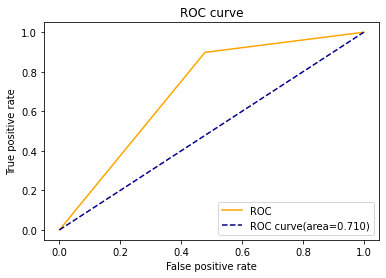

In [43]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        46
           1       0.82      0.90      0.85       108

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



# USING KNN WITH HYPERPARAMETER TUNING

In [45]:
scaler=StandardScaler()

In [46]:
X_scaled=scaler.fit_transform(X)

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [48]:
knn=KNeighborsClassifier()

In [49]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [52]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [53]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [54]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [55]:
accuracy=accuracy_score(Y_test,Y_pred)

In [56]:
accuracy

0.8246753246753247

In [57]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[ 22,  24],
       [  3, 105]], dtype=int64)

In [58]:
auc=roc_auc_score(Y_test,Y_pred)

In [59]:
auc

0.7252415458937198

In [60]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

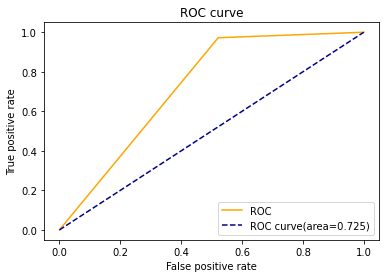

In [61]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.48      0.62        46
           1       0.81      0.97      0.89       108

    accuracy                           0.82       154
   macro avg       0.85      0.73      0.75       154
weighted avg       0.83      0.82      0.81       154



# MODELLING WITH RANDOM FOREST

In [63]:
X=df.drop(columns="Loan_Status")
Y=df["Loan_Status"]

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)
Y_pred=rf_classifier.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[27 19]
 [19 89]]
0.7532467532467533
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        46
           1       0.82      0.82      0.82       108

    accuracy                           0.75       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.75      0.75      0.75       154



# RANDOM FOREST WITH HYPERPARAMETER (RANDOM AND GRID)

In [67]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt','log2']

max_depth = [int(x) for x in np.linspace(10, 1000,10)]

min_samples_split = [2, 5, 10,14]

min_samples_leaf = [1, 2, 4,6,8]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [68]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [69]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [70]:
best_random_grid=rf_randomcv.best_estimator_

In [71]:
best_random_grid

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=14,
                       n_estimators=200)

In [72]:
from sklearn.metrics import accuracy_score
Y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[ 22  24]
 [  5 103]]
Accuracy Score 0.8116883116883117
Classification report:               precision    recall  f1-score   support

           0       0.81      0.48      0.60        46
           1       0.81      0.95      0.88       108

    accuracy                           0.81       154
   macro avg       0.81      0.72      0.74       154
weighted avg       0.81      0.81      0.79       154



# GRID SEARCH CV 

In [73]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['sqrt'], 'min_samples_leaf': [6, 8, 10], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [0, 100, 200, 300, 400]}


In [75]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [0, 100, 200, 300, 400]},
             verbose=2)

In [76]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=16,
                       n_estimators=300)

In [77]:
best_grid=grid_search.best_estimator_

In [78]:
best_grid

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=6, min_samples_split=16,
                       n_estimators=300)

In [79]:
Y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))
print("Classification report: {}".format(classification_report(Y_test,Y_pred)))

[[ 22  24]
 [  5 103]]
Accuracy Score 0.8116883116883117
Classification report:               precision    recall  f1-score   support

           0       0.81      0.48      0.60        46
           1       0.81      0.95      0.88       108

    accuracy                           0.81       154
   macro avg       0.81      0.72      0.74       154
weighted avg       0.81      0.81      0.79       154



In [80]:
accuracy=accuracy_score(Y_test,Y_pred)

In [81]:
accuracy

0.8116883116883117

In [82]:
auc=roc_auc_score(Y_test,Y_pred)

In [83]:
auc

0.7159822866344605

In [84]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

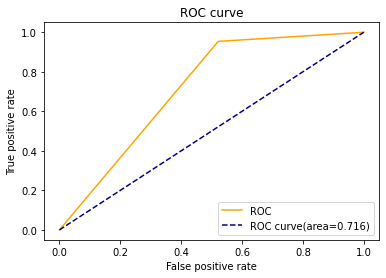

In [85]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

# DECISION TREE

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
X=df.drop(columns="Loan_Status")
Y=df["Loan_Status"]

In [88]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [89]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [90]:
Y_pred=dt.predict(X_test)

In [91]:
accuracy=accuracy_score(Y_test,Y_pred)

In [92]:
accuracy

0.7077922077922078

In [93]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[29, 17],
       [28, 80]], dtype=int64)

In [94]:
auc=roc_auc_score(Y_test,Y_pred)

In [95]:
auc

0.6855877616747181

In [96]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

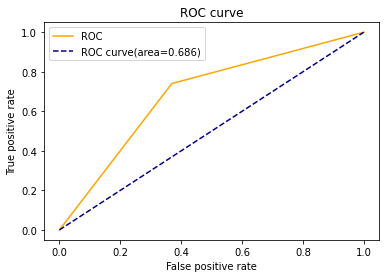

In [97]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [98]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56        46
           1       0.82      0.74      0.78       108

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.73      0.71      0.72       154



# DECISIONTREE WITH HYPER PARAMETER

In [99]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [100]:
dt=DecisionTreeClassifier()

In [101]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':['entropy','gini']}

In [102]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [103]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [104]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 4}

In [107]:
Y_pred=clf.predict(X_test)

In [112]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[ 22,  24],
       [  4, 104]], dtype=int64)

In [113]:
accuracy=accuracy_score(Y_test,Y_pred)

In [114]:
accuracy

0.8181818181818182

In [115]:
auc=roc_auc_score(Y_test,Y_pred)

In [116]:
auc

0.7206119162640902

In [117]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

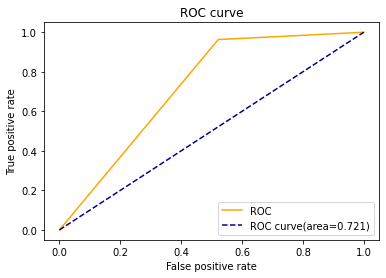

In [126]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [127]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.48      0.61        46
           1       0.81      0.96      0.88       108

    accuracy                           0.82       154
   macro avg       0.83      0.72      0.75       154
weighted avg       0.82      0.82      0.80       154



# GRADIENT BOOSTING

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
X=df.drop(columns="Loan_Status")
Y=df["Loan_Status"]

In [130]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [131]:
gbdt=GradientBoostingClassifier()

In [132]:
gbdt.fit(X_train,Y_train)

GradientBoostingClassifier()

In [133]:
Y_pred=gbdt.predict(X_test)

In [134]:
accuracy=accuracy_score(Y_test,Y_pred)

In [135]:
accuracy

0.7987012987012987

In [136]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[ 23,  23],
       [  8, 100]], dtype=int64)

In [137]:
auc=roc_auc_score(Y_test,Y_pred)

In [138]:
auc

0.712962962962963

In [139]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

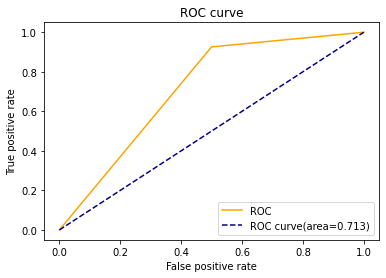

In [140]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [141]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.50      0.60        46
           1       0.81      0.93      0.87       108

    accuracy                           0.80       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.79      0.80      0.79       154



# GBDT WITH HYPER PARAMETER

In [142]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [143]:
gbdt=GradientBoostingClassifier()

In [144]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'learning_rate':np.arange(0.1,1,0.1)}

In [145]:
clf=GridSearchCV(gbdt,param_grid,cv=5,n_jobs=-1)

In [146]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [148]:
clf.best_params_

{'learning_rate': 0.5,
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 6}

In [149]:
Y_pred=clf.predict(X_test)

In [150]:
accuracy=accuracy_score(Y_test,Y_pred)

In [151]:
accuracy

0.7857142857142857

In [152]:
cfm=confusion_matrix(Y_test,Y_pred)
cfm

array([[27, 19],
       [14, 94]], dtype=int64)

In [153]:
auc=roc_auc_score(Y_test,Y_pred)

In [154]:
auc

0.7286634460547503

In [155]:
fpr,tpr,thresholds=roc_curve(Y_test,Y_pred)

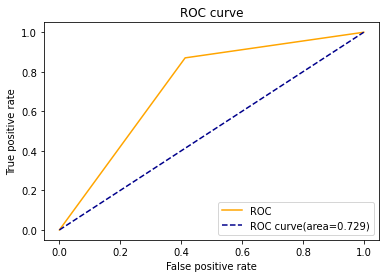

In [156]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.3f)'%auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [157]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        46
           1       0.83      0.87      0.85       108

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



# Conclusion:

Conducted 4 models on Loan Application Status Project dataset namely KNN, Random Forest, Desicion Tree and Gradient Boosting with Hyperparameter tuning It comes to a conclusion that Decision Tree Model is providing best score for Avacado Project dataset r2_score=0.8181818181818182

In [158]:
md=[knn,rf,dt,gbdt]
import pickle
filename="Loan Application.pkl"
pickle.dump(md,open(filename,"wb"))